In [ ]:
!pip install mediapipe opencv-python

In [ ]:
pip install --upgrade mediapipe

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [ ]:
# VIDEO FEED
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
#bicep curl module

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


KeyboardInterrupt: 

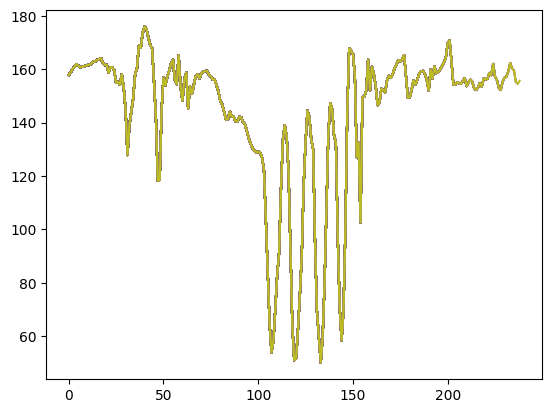

In [1]:
# Import libraries
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Initialize camera
cap = cv2.VideoCapture(0)
width = int(cap.get(3))
height = int(cap.get(4))

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Variables to track curl counter and state
curl_count = 0
curl_state = None

# Initialize list to store angles
angle_history = []

# Function to calculate angle between vectors
def calculateAngle(v1, v2):

  # Normalize the vectors
  v1_unit = v1 / np.linalg.norm(v1)
  v2_unit = v2 / np.linalg.norm(v2)

  # Calculate angle
  angle_rad = np.arccos(np.clip(np.dot(v1_unit, v2_unit), -1.0, 1.0))
  angle_deg = np.rad2deg(angle_rad)

  return angle_deg

# Main loop
while True:

  # Get video frame
  ret, frame = cap.read()

  # Detect pose
  results = pose.process(frame)

  # Check for pose landmarks
  if results.pose_landmarks:

    # Extract landmark coordinates
    landmarks = []
    for landmark in results.pose_landmarks.landmark:
      landmarks.append([int(landmark.x * width), int(landmark.y * height)])

    # Get shoulder, elbow, wrist coordinates
    shoulder_x, shoulder_y = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
    elbow_x, elbow_y = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW]
    wrist_x, wrist_y = landmarks[mp_pose.PoseLandmark.LEFT_WRIST]

    # Calculate coordinate vectors
    v1 = [shoulder_x - elbow_x, shoulder_y - elbow_y]
    v2 = [wrist_x - elbow_x, wrist_y - elbow_y]

    # Calculate angle between arm and forearm
    angle = calculateAngle(v1, v2)

    # Curl counter state machine logic
    if curl_state is None:
      if angle > 160:
        curl_state = "curling up"

    elif curl_state == "curling up":
      if angle < 60:
        curl_state = "curling down"

    elif curl_state == "curling down":
      if angle > 130:
        curl_state = "curling up"
        curl_count += 1

    # Append angle to history list
    angle_history.append(angle)

    # Plot angle history
    plt.plot(angle_history)

    # Overlay curl count
    cv2.putText(frame, 'Curls: ' + str(curl_count), (10,30), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 2)

    # Draw landmarks
    for landmark in landmarks:
      cv2.circle(frame, landmark, 5, (0,255,0), -1)

  # Display video
  cv2.imshow('Curl Counter', frame)

  # Break on q key
  if cv2.waitKey(1) == ord('q'):
    break

# Release camera and close windows
cap.release()
cv2.destroyAllWindows()
plt.ioff()

In [ ]:
#squat module

KeyboardInterrupt: 

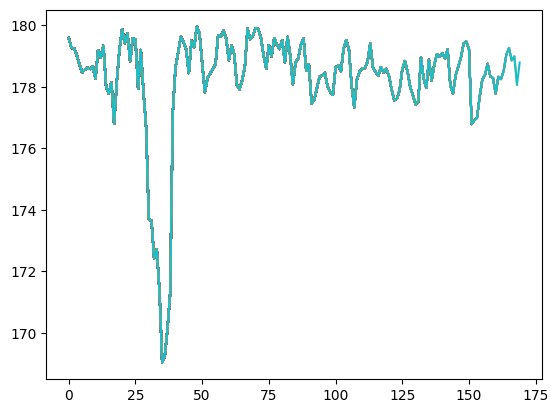

: 

In [2]:
# Import libraries
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Initialize camera
cap = cv2.VideoCapture(0)
width = int(cap.get(3))
height = int(cap.get(4))

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Variables to track squat counter and state
squat_count = 0
squat_state = None

# Initialize list to store angles
angle_history = []

# Function to calculate angle between vectors
def calculateAngle(v1, v2):

  # Normalize the vectors
  v1_unit = v1 / np.linalg.norm(v1)
  v2_unit = v2 / np.linalg.norm(v2)

  # Calculate angle
  angle_rad = np.arccos(np.clip(np.dot(v1_unit, v2_unit), -1.0, 1.0))
  angle_deg = np.rad2deg(angle_rad)

  return angle_deg

# Main loop
while True:

  # Get video frame
  ret, frame = cap.read()

  # Detect pose
  results = pose.process(frame)

  # Check for pose landmarks
  if results.pose_landmarks:

    # Extract landmark coordinates
    landmarks = []
    for landmark in results.pose_landmarks.landmark:
      landmarks.append([int(landmark.x * width), int(landmark.y * height)])

    # Get hip, knee, ankle coordinates
    hip_x, hip_y = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
    knee_x, knee_y = landmarks[mp_pose.PoseLandmark.LEFT_KNEE]
    ankle_x, ankle_y = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE]

    # Calculate coordinate vectors
    v1 = [hip_x - knee_x, hip_y - knee_y]
    v2 = [ankle_x - knee_x, ankle_y - knee_y]

    # Calculate angle between thigh and lower leg
    angle = calculateAngle(v1, v2)

    # Squat counter state machine logic
    if squat_state is None:
      if angle > 170:
        squat_state = "going down"

    elif squat_state == "going down":
      if angle < 90:
        squat_state = "going up"

    elif squat_state == "going up":
      if angle > 170:
        squat_state = "going down"
        squat_count += 1

    # Append angle to history list
    angle_history.append(angle)

    # Plot angle history
    plt.plot(angle_history)

    # Overlay squat count
    cv2.putText(frame, 'Squats: ' + str(squat_count), (10,30), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 2)

    # Draw landmarks
    for landmark in landmarks:
      cv2.circle(frame, landmark, 5, (0,255,0), -1)

  # Display video
  cv2.imshow('Squat Counter', frame)

  # Break on q key
  if cv2.waitKey(1) == ord('q'):
    break

# Release camera and close windows
cap.release()
cv2.destroyAllWindows()
plt.ioff()

In [ ]:
#push up module

In [ ]:
import cv2, mediapipe as mp, numpy as np

# setting up some initial variables
cap = cv2.VideoCapture(0)
w = int(cap.get(3))
h = int(cap.get(4))

pose = mp.solutions.pose.Pose()

# count the pushups
pushup_counter = 0
pushup_stage = None

# a function to calculate angles
def calculate_ang(a, b):
    a_u = a / np.linalg.norm(a)
    b_u = b / np.linalg.norm(b)
    ang_rad = np.arccos(np.clip(np.dot(a_u, b_u), -1.0, 1.0))
    ang_deg = np.rad2deg(ang_rad)
    return ang_deg

while True:
    ret, frame = cap.read()
    result = pose.process(frame)
    landmarks = []

    if result.pose_landmarks:
        for lm in result.pose_landmarks.landmark:
            landmarks.append([int(lm.x * w), int(lm.y * h)])

        # Get hip, elbow, shoulder coordinates
        hip = np.array(landmarks[mp.solutions.pose.PoseLandmark.LEFT_HIP.value])
        elbow = np.array(landmarks[mp.solutions.pose.PoseLandmark.LEFT_ELBOW.value])
        shoulder = np.array(landmarks[mp.solutions.pose.PoseLandmark.LEFT_SHOULDER.value])

        # Calculate vectors
        a = elbow - shoulder
        b = elbow - hip

        # Calculate elbow angle
        elbow_ang = calculate_ang(a, b)

        # Logic for counting pushups
        if pushup_stage is None:
            if elbow_ang > 160: # arms straight
                pushup_stage = "down"
        elif pushup_stage == "down":
            if elbow_ang < 90: # arms bent
                pushup_stage = "up"
        elif pushup_stage == "up":
            if elbow_ang > 160: # arms straight
                pushup_stage = "down"
                pushup_counter += 1

        cv2.putText(frame, 'Push-ups: ' + str(pushup_counter), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Draw landmarks
        for landmark in landmarks:
            cv2.circle(frame, tuple(landmark), 5, (0, 255, 0), -1)

    cv2.imshow('Exercise Counter', frame)

    # use ESC key to stop
    if cv2.waitKey(1) == 27:
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

def bicep_counter():
    # Initialize camera
    cap = cv2.VideoCapture(0)
    width = int(cap.get(3))
    height = int(cap.get(4))

    # Initialize Mediapipe Pose
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose()

    # Variables to track curl counter and state
    curl_count = 0
    curl_state = None

    # Initialize list to store angles
    angle_history = []

    # Function to calculate angle between vectors
    def calculateAngle(v1, v2):
        v1_unit = v1 / np.linalg.norm(v1)
        v2_unit = v2 / np.linalg.norm(v2)
        angle_rad = np.arccos(np.clip(np.dot(v1_unit, v2_unit), -1.0, 1.0))
        angle_deg = np.rad2deg(angle_rad)
        return angle_deg

    while True:
        ret, frame = cap.read()
        results = pose.process(frame)

        if results.pose_landmarks:
            landmarks = []
            for landmark in results.pose_landmarks.landmark:
                landmarks.append([int(landmark.x * width), int(landmark.y * height)])

            elbow_x, elbow_y = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW]
            shoulder_x, shoulder_y = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
            
            # Calculate coordinate vectors
            v1 = np.array([shoulder_x - elbow_x, shoulder_y - elbow_y])
            v2 = np.array([elbow_x - shoulder_x, elbow_y - shoulder_y])
            
            # Calculate angle between vectors
            angle = calculateAngle(v1, v2)

            # Curl counter state machine logic
            if curl_state is None:
                if angle > 160:
                    curl_state = "curling up"
            elif curl_state == "curling up":
                if angle < 60:
                    curl_state = "curling down"
            elif curl_state == "curling down":
                if angle > 130:
                    curl_state = "curling up"
                    curl_count += 1

            # Append angle to history list
            angle_history.append(angle)

            # Plot angle history
            plt.plot(angle_history)

            # Overlay curl count
            cv2.putText(frame, 'Curls: ' + str(curl_count), (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)

            # Draw landmarks
            for landmark in landmarks:
                cv2.circle(frame, landmark, 5, (0, 255, 0), -1)

        cv2.imshow('Bicep Counter', frame)

        if cv2.waitKey(1) == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    plt.ioff()

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

def squat_counter():
    # Initialize camera
    cap = cv2.VideoCapture(0)
    width = int(cap.get(3))
    height = int(cap.get(4))

    # Initialize Mediapipe Pose
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose()

    # Variables to track squat counter and state
    squat_count = 0
    squat_state = None

    # Initialize list to store angles
    angle_history = []

    # Function to calculate angle between vectors
    def calculateAngle(v1, v2):
        v1_unit = v1 / np.linalg.norm(v1)
        v2_unit = v2 / np.linalg.norm(v2)
        angle_rad = np.arccos(np.clip(np.dot(v1_unit, v2_unit), -1.0, 1.0))
        angle_deg = np.rad2deg(angle_rad)
        return angle_deg

    while True:
        ret, frame = cap.read()
        results = pose.process(frame)

        if results.pose_landmarks:
            landmarks = []
            for landmark in results.pose_landmarks.landmark:
                landmarks.append([int(landmark.x * width), int(landmark.y * height)])

            hip_x, hip_y = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
            knee_x, knee_y = landmarks[mp_pose.PoseLandmark.LEFT_KNEE]
            ankle_x, ankle_y = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE]
            
            # Calculate coordinate vectors
            v1 = np.array([hip_x - knee_x, hip_y - knee_y])
            v2 = np.array([ankle_x - knee_x, ankle_y - knee_y])
            
            # Calculate angle between vectors
            angle = calculateAngle(v1, v2)

            # Squat counter state machine logic
            if squat_state is None:
                if angle > 170:
                    squat_state = "going down"
            elif squat_state == "going down":
                if angle < 90:
                    squat_state = "going up"
            elif squat_state == "going up":
                if angle > 170:
                    squat_state = "going down"
                    squat_count += 1

            # Append angle to history list
            angle_history.append(angle)

            # Plot angle history
            plt.plot(angle_history)

            # Overlay squat count
            cv2.putText(frame, 'Squats: ' + str(squat_count), (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)

            # Draw landmarks
            for landmark in landmarks:
                cv2.circle(frame, landmark, 5, (0, 255, 0), -1)

        cv2.imshow('Squat Counter', frame)

        if cv2.waitKey(1) == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    plt.ioff()


In [ ]:
import cv2
import mediapipe as mp
import numpy as np

def pushup_counter():
    # Initialize camera
    cap = cv2.VideoCapture(0)
    w = int(cap.get(3))
    h = int(cap.get(4))

    # Initialize Mediapipe Pose
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose()

    # Count the pushups
    pushup_counter = 0
    pushup_stage = None

    # Function to calculate angles
    def calculate_ang(a, b):
        a_u = a / np.linalg.norm(a)
        b_u = b / np.linalg.norm(b)
        ang_rad = np.arccos(np.clip(np.dot(a_u, b_u), -1.0, 1.0))
        ang_deg = np.rad2deg(ang_rad)
        return ang_deg

    while True:
        ret, frame = cap.read()
        result = pose.process(frame)
        landmarks = []

        if result.pose_landmarks:
            for lm in result.pose_landmarks.landmark:
                landmarks.append([int(lm.x * w), int(lm.y * h)])

            hip = np.array(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
            elbow = np.array(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value])
            shoulder = np.array(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value])

            # Calculate vectors
            a = elbow - shoulder
            b = elbow - hip

            # Calculate elbow angle
            elbow_ang = calculate_ang(a, b)

            # Logic for counting pushups
            if pushup_stage is None:
                if elbow_ang > 160:  # arms straight
                    pushup_stage = "down"
            elif pushup_stage == "down":
                if elbow_ang < 90:  # arms bent
                    pushup_stage = "up"
            elif pushup_stage == "up":
                if elbow_ang > 160:  # arms straight
                    pushup_stage = "down"
                    pushup_counter += 1

            cv2.putText(frame, 'Push-ups: ' + str(pushup_counter), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (0, 255, 0), 2)

            # Draw landmarks
            for landmark in landmarks:
                cv2.circle(frame, tuple(landmark), 5, (0, 255, 0), -1)

        cv2.imshow('Exercise Counter', frame)

        # Use ESC key to stop
        if cv2.waitKey(1) == 27:
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()
